age,workclass,education,education.num,marital.status,occupation,race,sex,hPerWeek,native.country,income
2,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,3,United-States,<=50K
3,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,United-States,<=50K
2,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,3,United-States,<=50K
4,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,3,United-States,<=50K
1,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,3,Cuba,<=50K
2,Private,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,3,United-States,<=50K


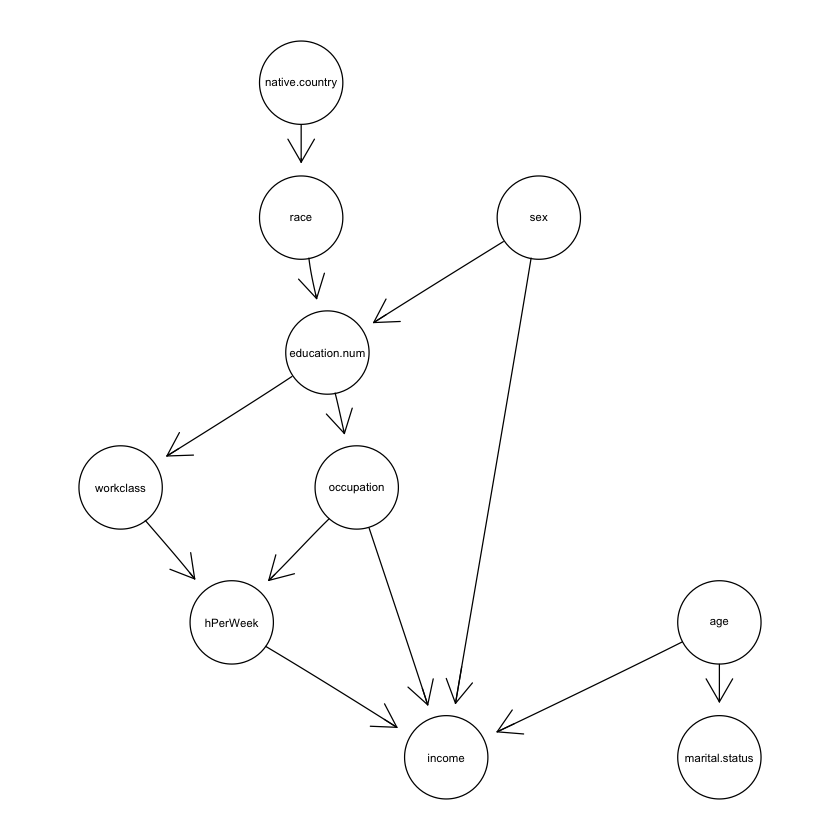

In [10]:
library("gRain")
library("Rgraphviz")
library("dagitty")

setwd("/Users/apple1/Dropbox/Uni/Nijmegen/WS17_18/BN")
data <- read.table(header=T, sep=",", 'adult_cleaned.csv')


our_network <- dag(~ race:native.country + education.num:race:sex + workclass:education.num + hPerWeek:workclass:occupation + occupation:education.num + marital.status:age + income:age:sex:occupation:hPerWeek)
plot(our_network)
head(data)

data[data=="?"]<-NA
data<-data[complete.cases(data),]

In [57]:
pp <- extractCPT( data, our_network, smooth=1)

In [4]:
g <- dagitty( "dag{ native.country -> race -> education.num -> occupation -> hPerWeek -> income; occupation -> income; education.num -> workclass -> hPerWeek; sex -> education.num; sex -> income; age -> income; age -> marital.status}" )

In [5]:
independencies <- impliedConditionalIndependencies( g )

In [17]:
num_test <- 0
for(i in 1:length(independencies)){
    indp <- independencies[i]
    xyz <- unlist(indp)
    if(length(xyz)==2){
        print(paste('test ', xyz[1], ' and ', xyz[2]))
        tst <- chisq.test(data[,xyz[1]], data[,xyz[2]])
        res <- sqrt(max((tst$statistic - tst$parameter)/(( nrow(data) - 1)*tst$parameter),0))
        if(res > 0.05){
            print(res)
        }
        num_test <- num_test + 1
    }
    else{
        print(paste('test ', xyz[1], ' and ', xyz[2], 'given ', xyz[3]))
        strata <- as.data.frame(sort(table(data[,xyz[3]]),decreasing=T))
        visited <- 0
        idx <- 1
        all <- sum(strata['Freq'])
        while(visited<0.8*all){
            print(strata[idx,1],max.levels=0)
            subdata <- subset(data, data[,xyz[3]] == strata[idx,1])
            x <- subdata[,xyz[1]]
            y <- subdata[,xyz[2]]
            if(length(unique(x)) < 2 || length(unique(y)) < 2){
                break
            }
            tst <- chisq.test(x,y)
            res <- sqrt(max((tst$statistic - tst$parameter)/(( nrow(subdata) - 1)*tst$parameter),0))
            if(res > 0.05){
                print(res)
            }
            
            visited <- visited + strata[idx,2]
            idx <- idx + 1
            num_test <- num_test + 1
        }
    }
}

[1] "test  age  and  education.num"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  age  and  hPerWeek"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] 0.0752891
[1] "test  age  and  native.country"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  age  and  occupation"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  age  and  race"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  age  and  sex"
[1] "test  age  and  workclass"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  education.num  and  hPerWeek given  occupation"
[1]  Prof-specialty
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Craft-repair
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Exec-managerial
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Adm-clerical
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Sales
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Other-service
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Machine-op-inspct
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  ?
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  education.num  and  income given  hPerWeek"
[1] 3
Levels: 3 4 2 5 1 0
[1] 0.08439493
[1] 4
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.09788568
[1] 2
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1010534
[1] 5
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.09036378
[1] "test  education.num  and  income given  occupation"
[1]  Prof-specialty
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.08467288
[1]  Craft-repair
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Exec-managerial
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.08245568
[1]  Adm-clerical
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Sales
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.08547286
[1]  Other-service
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Machine-op-inspct
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  ?
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.08630256
[1] "test  education.num  and  marital.status"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  education.num  and  native.country given  race"
[1]  White
Levels:  White  Black  Asian-Pac-Islander  Amer-Indian-Eskimo  Other


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  hPerWeek  and  marital.status"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] 0.05279332
[1] "test  hPerWeek  and  native.country given  race"
[1]  White
Levels:  White  Black  Asian-Pac-Islander  Amer-Indian-Eskimo  Other


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  hPerWeek  and  native.country given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  hPerWeek  and  native.country given  occupation"
[1]  Prof-specialty
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Craft-repair
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Exec-managerial
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Adm-clerical
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Sales
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Other-service
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Machine-op-inspct
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  ?
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  hPerWeek  and  race given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  hPerWeek  and  race given  occupation"
[1]  Prof-specialty
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Craft-repair
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Exec-managerial
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Adm-clerical
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Sales
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Other-service
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Machine-op-inspct
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  ?
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  hPerWeek  and  sex given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.1188153
[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.124513
[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.09090429
[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.07851647
[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.1307319
[1] "test  hPerWeek  and  sex given  occupation"
[1]  Prof-specialty
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1] 0.08603667
[1]  Craft-repair
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Exec-managerial
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1] 0.1013189
[1]  Adm-clerical
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1] 0.05904712
[1]  Sales
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1] 0.1712543
[1]  Other-service
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1] 0.05970264
[1]  Machine-op-inspct
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1] 0.06963644
[1]  ?
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1] 0.07502985
[1] "test  income  and  marital.status given  age"
[1] 2
Levels: 2 1 3 4 0 5 6 7


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1659319
[1] 1
Levels: 2 1 3 4 0 5 6 7


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.143006
[1] 3
Levels: 2 1 3 4 0 5 6 7


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1736704
[1] 4
Levels: 2 1 3 4 0 5 6 7
[1] 0.1650548
[1] "test  income  and  native.country given  race"
[1]  White
Levels:  White  Black  Asian-Pac-Islander  Amer-Indian-Eskimo  Other


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  income  and  native.country given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  income  and  native.country given  occupation"
[1]  Prof-specialty
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Craft-repair
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Exec-managerial
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Adm-clerical
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Sales
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Other-service
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Machine-op-inspct
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  ?
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  income  and  native.country given  hPerWeek"
[1] 3
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 4
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 2
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 5
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  income  and  race given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  income  and  race given  occupation"
[1]  Prof-specialty
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1]  Craft-repair
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1]  Exec-managerial
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1]  Adm-clerical
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Sales
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces
[1]  Other-service
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  Machine-op-inspct
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1]  ?
15 Levels:  Prof-specialty  Craft-repair  Exec-managerial ...  Armed-Forces


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  income  and  race given  hPerWeek"
[1] 3
Levels: 3 4 2 5 1 0
[1] 0.05041096
[1] 4
Levels: 3 4 2 5 1 0
[1] 2
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 5
Levels: 3 4 2 5 1 0
[1] "test  income  and  workclass given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.05140127
[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.06623478
[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.05036439
[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.06255391
[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] "test  income  and  workclass given  hPerWeek"
[1] 3
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.05390449
[1] 4
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.05218923
[1] 2
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.07566971
[1] 5
Levels: 3 4 2 5 1 0


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.06311098
[1] "test  marital.status  and  native.country"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  marital.status  and  occupation"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  marital.status  and  race"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  marital.status  and  sex"
[1] 0.1884615
[1] "test  marital.status  and  workclass"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  native.country  and  occupation given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  native.country  and  occupation given  race"
[1]  White
Levels:  White  Black  Asian-Pac-Islander  Amer-Indian-Eskimo  Other


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  native.country  and  sex"


Warning message in chisq.test(data[, xyz[1]], data[, xyz[2]]):
“Chi-squared approximation may be incorrect”

[1] "test  native.country  and  workclass given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  native.country  and  workclass given  race"
[1]  White
Levels:  White  Black  Asian-Pac-Islander  Amer-Indian-Eskimo  Other


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  occupation  and  race given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  occupation  and  sex given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1338703
[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1191977
[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.0718224
[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.06234529
[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1379443
[1] "test  occupation  and  workclass given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1085465
[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1076629
[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1212252
[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1224701
[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.1359985
[1] "test  race  and  sex"
[1] 0.05879805
[1] "test  race  and  workclass given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] "test  sex  and  workclass given  education.num"
[1] 9
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.05592542
[1] 10
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1


Warning message in chisq.test(x, y):
“Chi-squared approximation may be incorrect”

[1] 0.05520585
[1] 13
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.06596759
[1] 14
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.08192894
[1] 11
Levels: 9 10 13 14 11 7 12 6 4 15 5 8 16 3 2 1
[1] 0.06510009


In [60]:
net1 <- compile( grain( our_network, data, smooth=1 ) )

In [61]:
querygrain(net1, nodes='income',type = "marginal", evidence = NULL, exclude = TRUE, normalize = TRUE, result = "array", details = 0)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.list(obj)
9. repr_list_generic(obj, "markdown", "%s. %s\n", "$%s\n:   %s\n", 
 .     "**$%s** = %s", "%s\n\n", numeric_item = "[[%s]]\n:   %s\n", 
 .     item_uses_numbers = TRUE, escape_fun = html_escape)
10. lapply(vec, format2repr[[fmt]])
11. FUN(X[[i]], ...)
12. repr_markdown.nume

$income
income
    <=50K      >50K 
0.7429364 0.2570636

In [62]:
table(data['income'])


 <=50K   >50K 
 24720   7841 

In [63]:
24720 / (24720+7841)

[1] 0.7591904